# Data Cleaning

Importing useful libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Loading in the data

In [28]:
df = pd.read_csv('/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2023-03-31.csv')
print(df.shape)
df.head()

(4857377, 8)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
bitcoin_df = df.copy() # making a copy of the dataset to work with

In [30]:
time_col = pd.to_datetime(bitcoin_df['Timestamp'], unit='s') # converting the 'Timestamp' column to 
                                                             # datetime object

bitcoin_df.drop('Timestamp', axis=1, inplace=True) # drops the 'Timestamp' column
bitcoin_df['Timestamp'] = time_col # creates a new 'Timestamp' column with datetime dtype
bitcoin_df.set_index('Timestamp', inplace=True) # makes 'Timestamp' the index

bitcoin_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
missing_val_mask = bitcoin_df.isnull() # creating a dataframe with boolean values indicating the presence of 
                                       # missing value
missing_val_mask.sum()

Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

Let's check if all columns have Nan values for each row with any Nan value. 

In [32]:
missing_val_mask.sum(axis=1).sum() == len(bitcoin_df.columns) * missing_val_mask.sum().loc['Open']

True

### Confirmed!

In [33]:
n_missing_val = missing_val_mask.sum().loc['Open'] # number of rows with missing values
print('There are {} rows with missing values which make up {}% of the total number of rows'.format( \
                                            n_missing_val, round(100*n_missing_val / bitcoin_df.shape[0], 3)))

There are 1243608 rows with missing values which make up 25.602% of the total number of rows


### From domain knowledge of Bitcoin trading, Weighted Price = Volume(Currency) / Volume(BTC). Let's check if this is true of our data. First, let's see what happens when Volume(BTC) = 0

In [34]:
bitcoin_df[bitcoin_df['Volume_(BTC)'] == 0]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2012-05-21 10:28:00,5.08,5.08,5.08,5.08,0.0,0.0,5.08
2012-08-27 10:49:00,11.92,11.92,11.92,11.92,0.0,0.0,11.92
2013-03-30 17:08:00,92.21,92.21,92.21,92.21,0.0,0.0,92.21
2013-05-22 01:09:00,118.00,118.00,118.00,118.00,0.0,0.0,118.00
2013-06-06 01:52:00,121.04,121.04,121.04,121.04,0.0,0.0,121.04
2013-06-19 08:59:00,105.71,105.71,105.71,105.71,0.0,0.0,105.71
2013-06-22 19:39:00,101.16,101.16,101.16,101.16,0.0,0.0,101.16
2013-06-24 20:36:00,98.88,98.88,98.88,98.88,0.0,0.0,98.88
2013-06-26 20:50:00,99.17,99.17,99.17,99.17,0.0,0.0,99.17


### It seems when Volume(BTC) = 0, OHLC values are the same and Weighted_Price = OHLC constant values. Also, Volume(Currency) = 0. It looks like the situation that will occur when there are no tradings and it gives us a hint on how we will impute missing values.

### So, we expect that the difference between (Volume(Currency) / Volume(BTC)) and Weighted_Price should be equal to (Total number of observations) - (total number of Nan values) - (number of observations where Volume(BTC) = 0). Let;s check it out!

In [35]:
(np.round(np.abs(bitcoin_df['Volume_(Currency)'] / bitcoin_df['Volume_(BTC)'] - bitcoin_df['Weighted_Price']), 
    5) == 0).sum() == bitcoin_df.shape[0] - n_missing_val - bitcoin_df[bitcoin_df['Volume_(BTC)'] == 0].shape[0]

True

### Confirmed!

In [36]:
# creating a dataframe that contains only rows with missing values
missing_val_df = bitcoin_df[missing_val_mask.sum(axis=1) == 7].copy()

# asserting that the number of rows in 'missing_val_df' is same as the number of rows with missing values in 'df'
assert missing_val_df.shape[0] == n_missing_val 

In [ ]:
# creating a 'date' column that contains only the date
missing_val_df[''] = pd.Series(missing_val_df.index).apply(lambda x: x.date()).values
missing_val_df.head()

Let's check the duration of Nan values per day in minutes

In [ ]:
daily_Nan_minute = missing_val_df.groupby('date').apply(lambda x: x.shape[0])

In [ ]:
assert daily_Nan_minute.sum() == n_missing_val

In [ ]:
daily_Nan_minute.tail()

In [ ]:
print('a day has {} minutes'.format(60*24))
print('maximum duration of Nan values in minute is {}mins which is {}% of the day'.format( \
                daily_Nan_minute.max(), round(100*daily_Nan_minute.max() / (60*24), 3)))
print('minimum duration of Nan values in minute is {}mins which is {}% of the day'.format( \
                daily_Nan_minute.min(), round(100*daily_Nan_minute.min() / (60*24), 3)))

In [ ]:
missing_val_df.tail(1) # checking the last time with Nan value

In [ ]:
print('1st quartile of timestamp with Nan value is {}'.format(missing_val_df.index[len(missing_val_df)//4]))
print('median of timestamp with Nan value is {}'.format(missing_val_df.index[len(missing_val_df)//2]))
print('3rd quartile of timestamp with Nan value is {}'.format(missing_val_df.index[3*(len(missing_val_df)//4)]))

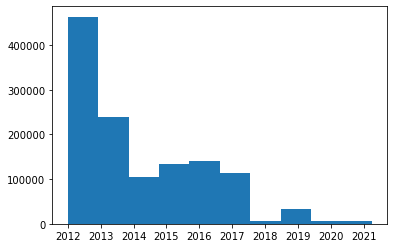

In [38]:
hist = plt.hist(missing_val_df.index) # checking the distribution of the Nan values

So we see that the Nan values are skewed to the left. Nan values are heavily present in past years than earlier years.

### Let's see the reason for the missing values as stated by Zielak the provider of the dataset so we know how to handle them.

> *CSV files for select bitcoin exchanges for the time period of Jan 2012 to September 2020, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time. **TIMESTAMPS WITHOUT ANY TRADES OR ACTIVITY HAVE THEIR DATA FIELDS FILLED WITH NANS**...*

### Zielak also told us about jumps in timestamps and here is the reason:
> ***...IF A TIMESTAMP IS MISSING, OR IF THERE ARE JUMPS, THIS MAY BE BECAUSE THE EXCHANGE (OR ITS API) WAS DOWN, THE EXCHANGE (OR ITS API) DID NOT EXIST, OR SOME OTHER UNFORESEEN TECHNICAL ERROR IN THE DATA REPORTING OR GATHERING***. *All effort has been made to deduplicate entries and verify the contents are correct and complete to the best of my ability, but obviously trust at your own risk.*

So, let's check for time jumps and contraction. Jump if any of the sampling rate is greater than a minute and contraction if it is less than a minute.

In [39]:
bitcoin_df['time_col'] = bitcoin_df.index
# taking the first order difference to get the duration of Nan values

time_jump = (bitcoin_df['time_col'] - bitcoin_df['time_col'].shift()).dropna() 
delta_time = time_jump.apply(lambda x: x.total_seconds()) # converts the duration to seconds

delta_time.head()

Timestamp
2011-12-31 07:53:00    60.0
2011-12-31 07:54:00    60.0
2011-12-31 07:55:00    60.0
2011-12-31 07:56:00    60.0
2011-12-31 07:57:00    60.0
Name: time_col, dtype: float64

In [40]:
assert delta_time.shape[0] + 1 == bitcoin_df.shape[0] # confirming the number of rows

In [41]:
print('There is {} time jump'.format((delta_time > 60).sum()))
print('There is {} time contraction'.format((delta_time < 60).sum()))

There is 1 time jump
There is 0 time contraction


So there is no time contraction, let's now find where exactly the time jump is.

In [42]:
jump_duration = delta_time[delta_time > 60].values[0]
print('time jump duration is {} minutes'.format(round(jump_duration / 60, 3)))

time jump duration is 6473.0 minutes


In [43]:
ind_of_time_jump = delta_time.index.get_loc(delta_time[delta_time > 60].index[0])
time_jump_df = bitcoin_df.iloc[ind_of_time_jump: ind_of_time_jump+2]
time_jump_df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2015-01-05 09:12:00,276.80,276.8,276.80,276.8,0.100000,27.680000,276.800000,2015-01-05 09:12:00
2015-01-09 21:05:00,272.45,305.0,272.45,291.1,175.837078,50502.066285,287.209426,2015-01-09 21:05:00


In [44]:
print('Total time jump in days is {}'.format(time_jump_df.index[-1] - time_jump_df.index[0]))

Total time jump in days is 4 days 11:53:00


Although, there are more than one reasons for jumps in 'Timestamps' as stated by Zielak, one of worth noting is that "it may be the exchange or its API was down or didn't exist. A jump of 4days 11hrs 53mins was observed which is 6,473mins (6,473 jumps). This jump is huge and we can conclude that it may not be due to error in data gathering rather, it may be due to a downtime in API or exchanges that don't exist. 

Let's check if there is any duplicate in 'Timestamp' values

In [46]:
len(bitcoin_df['time_col'].unique()) == bitcoin_df.shape[0]

True

So, we conclude that there are no duplicates in 'Timestamp' values!

Let's check the total span of the dataset.

In [47]:
print('the dataset spans for {}'.format(bitcoin_df.index[-1] - bitcoin_df.index[0]))

the dataset spans for 3377 days 16:08:00


Let's now go back to the Nan values. this time, we will be handling them. since the cause of missingness is "No trading activity", it will be biased to use imputation methods like EMA or filling with a particular value since there was no trading activity in real sense.

There are two best ways to handle missing values of this nature:
1. By filling 'Volume_(BTC)', and 'Volume_(Currency)' columns with zeros since there was no trading activity. Then, we do forward fill for 'Close' column and fill 'Open', 'High', 'Low' and 'Weighted_Price' columns with the values of the 'Close' column to make it a constant (horizontal) line of that peroid of inactivity.
2. Dropping the rows with Nan values because in actual sense, there was no trade for those periods.

WE WILL BE USING THE FIRST APPROACH TO BUILD OUR MODEL

### Imputation

In [48]:
# creating a function to impute a given dataframe
def impute(df):
    df_imputed = df.copy() # creating a copy of df to use for imputing
    
    # forward filling the 'Close' column
    df_imputed['Close'].fillna(method='ffill', inplace=True)
    
    # imputing 'Volume_(BTC)' and 'Volume_(Currency)', with zeros
    df_imputed[['Volume_(BTC)', 'Volume_(Currency)']] = \
    df_imputed[['Volume_(BTC)', 'Volume_(Currency)']].fillna(0)
    
    # copying the values of 'Close' column to the four columns of 'Open', 'High', 'Low' and 'Weighted_Price' 
    # that would later be used for imputing.
    impute_cols = ['Open', 'High', 'Low', 'Weighted_Price']
    impute_df = pd.DataFrame({k: df_imputed['Close'] for k in impute_cols})
    
    # imputing 'OHL' and 'Weighted_Price'
    df_imputed[impute_cols] = df_imputed[impute_cols].fillna(impute_df)
    
    return df_imputed

In [49]:
bitcoin_df_imputed = impute(bitcoin_df) # imputes 'bitcoin_df'
bitcoin_df_imputed.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.000000,0.0,4.39,2011-12-31 07:53:00
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.000000,0.0,4.39,2011-12-31 07:54:00
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.000000,0.0,4.39,2011-12-31 07:55:00
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.000000,0.0,4.39,2011-12-31 07:56:00


In [ ]:
print(bitcoin_df_imputed.shape)
bitcoin_df_imputed.isnull().sum()

In [50]:
# making a list of all columns apart from 'time_col' column and'Weighted_Price' column
cols = list(bitcoin_df_imputed.columns[:-2])

# creating the appropriate subplot indices for the cols to be used for making plots
ind = list(range(1, 7))

Let's create a function that would plot the columns with 'Timestamp' for a given dataframe

In [51]:
def plot_series_of_each_column(d_f, cols=cols):
    fig = plt.figure(figsize=(18, 12))
    for i, col in zip(ind, cols):
        a = fig.add_subplot(4, 2, i)
        plt.xlabel('year')
        plt.ylabel(col)
        plt.plot(d_f.index, d_f[col], '-')
        plt.grid()
    
    a = fig.add_subplot(4, 1, 4)
    plt.xlabel('year')
    plt.ylabel('Weighted_Price')
    plt.plot(d_f.index, d_f['Weighted_Price'], '-')
    plt.grid()

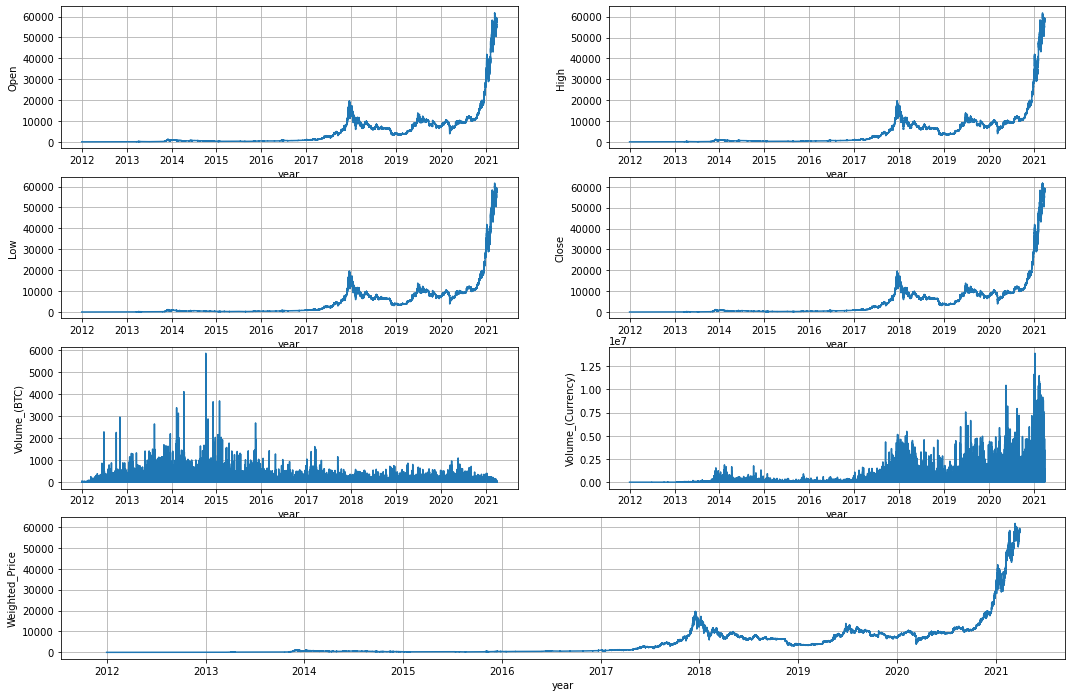

In [52]:
plot_series_of_each_column(bitcoin_df_imputed)

# Resampling

### resampling to a daily time frame

In [53]:
daily_Open = bitcoin_df_imputed['Open'].resample('D').first()
daily_High = bitcoin_df_imputed['High'].resample('D').max()
daily_Low = bitcoin_df_imputed['Low'].resample('D').min()
daily_Close = bitcoin_df_imputed['Close'].resample('D').last()
daily_Volume_BTC = bitcoin_df_imputed['Volume_(BTC)'].resample('D').sum()
daily_Volume_Currency = bitcoin_df_imputed['Volume_(Currency)'].resample('D').sum()

In [55]:
daily_df = pd.DataFrame({'Open': daily_Open, 'High': daily_High, 'Low': daily_Low, 'Close': daily_Close, \
                         'Volume_(BTC)': daily_Volume_BTC, 'Volume_(Currency)': daily_Volume_Currency})
daily_df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2021-03-27,55081.26,56686.15,53948.35,55839.42,2609.967580,1.443661e+08
2021-03-28,55817.85,56573.04,54677.51,55790.92,2073.449191,1.154652e+08
2021-03-29,55790.28,58402.68,54892.42,57600.10,5360.425663,3.069515e+08
2021-03-30,57623.66,59388.66,57011.00,58760.59,3392.338619,1.983618e+08
2021-03-31,58767.75,58778.18,58755.97,58778.18,2.712831,1.594178e+05


In [56]:
(daily_df['Volume_(BTC)'] == 0).sum() # checks if daily_Volume_BTC = 0 so we could calculate daily_Weighted_Price

3

### checking fo Nan values

In [57]:
daily_df.isnull().sum()

Open                 3
High                 3
Low                  3
Close                3
Volume_(BTC)         0
Volume_(Currency)    0
dtype: int64

In [58]:
daily_df[daily_df.isnull().sum(axis=1) == 4] # pulling out the Nan values

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2015-01-06,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-07,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-08,NaN,NaN,NaN,NaN,0.0,0.0


In [59]:
daily_df[daily_df[['Volume_(BTC)', 'Volume_(Currency)']].sum(axis=1) == 0] # pulling out rows where 'Volume(BTC)' 
                                                                           # and Volume(Currency)'s values are 0

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency)
Timestamp,,,,,,
2015-01-06,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-07,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-08,NaN,NaN,NaN,NaN,0.0,0.0


### It appeared that 'Volume(BTC) and Volume(Currency)'s values are zero where the other columns have Nan values and it as a result of the time jump in the data.

In [60]:
# calculates 'Weighted_Price' for the daily time frame
daily_df['Weighted_Price'] = daily_df['Volume_(Currency)'] / daily_df['Volume_(BTC)']
daily_df['Weighted_Price'].head()

Timestamp
2011-12-31    4.462126
2012-01-01    4.896730
2012-01-02    5.000000
2012-01-03    5.279641
2012-01-04    5.297575
Freq: D, Name: Weighted_Price, dtype: float64

In [61]:
daily_df[daily_df['Volume_(BTC)'] == 0] # checks what happens to 'Weighted_Price' when 'Volume_(BTC)' = 0

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2015-01-06,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2015-01-07,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2015-01-08,NaN,NaN,NaN,NaN,0.0,0.0,NaN


### We see that Weighted_Price has Nan values where Volume_(BTC) = 0 in the daily time frame. So, we will repeat our imputation process.

In [62]:
daily_df_imputed = impute(daily_df)
daily_df_imputed.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.317878,425.320338,4.462126
2012-01-01,4.58,5.00,4.58,5.00,21.602000,105.779160,4.896730
2012-01-02,5.00,5.00,5.00,5.00,19.048000,95.240000,5.000000
2012-01-03,5.00,5.32,5.00,5.29,88.037281,464.805210,5.279641
2012-01-04,5.29,5.57,4.93,5.57,107.233260,568.076197,5.297575


In [63]:
assert daily_df_imputed.isnull().sum().sum() == 0 # assert that Nan values have been handled.

In [64]:
print('bitcoin_df_imputed has been downsampled from a minute timeframe of {}'.format(bitcoin_df_imputed.shape[0])\
      + ' observations to a daily timeframe of {} observations'.format(daily_df_imputed.shape[0]))

bitcoin_df_imputed has been downsampled from a minute timeframe of 4857377 observations to a daily timeframe of 3379 observations


In [65]:
bitcoin_df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,time_col
Timestamp,,,,,,,,
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00
2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00
2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363,2021-03-31 00:00:00


### Since the actual data ended on 2020-09-14 00:00:00, we will do away with the last observation because that day has only one observation in the minute time frame.

In [66]:
daily_df_imputed = daily_df_imputed.iloc[:-1].copy()
daily_df_imputed.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2021-03-26,51292.65,55114.86,51263.38,55081.37,4874.251115,2.599110e+08,53323.266705
2021-03-27,55081.26,56686.15,53948.35,55839.42,2609.967580,1.443661e+08,55313.350689
2021-03-28,55817.85,56573.04,54677.51,55790.92,2073.449191,1.154652e+08,55687.493832
2021-03-29,55790.28,58402.68,54892.42,57600.10,5360.425663,3.069515e+08,57262.531315
2021-03-30,57623.66,59388.66,57011.00,58760.59,3392.338619,1.983618e+08,58473.476393


### Plots of the daily resampled series time series

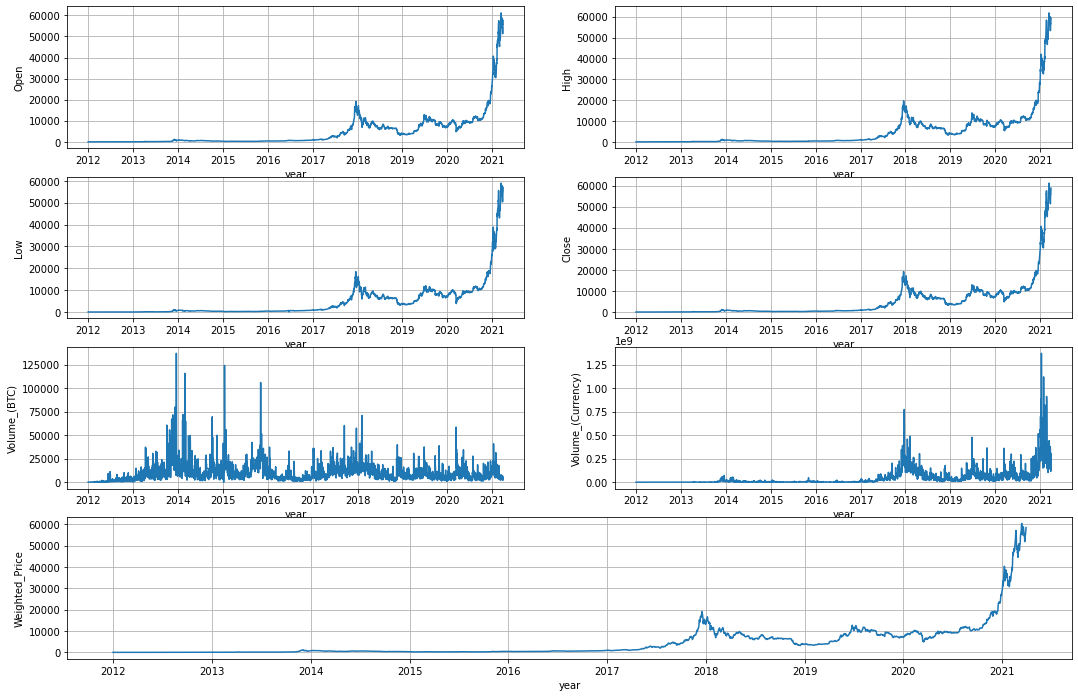

In [67]:
plot_series_of_each_column(daily_df_imputed)

## Correlation Test

In [68]:
daily_df_imputed.corr() # correlation dataframe

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999353,0.998876,0.998685,-0.010079,0.771991,0.999298
High,0.999353,1.000000,0.998813,0.999469,-0.004873,0.779966,0.999701
Low,0.998876,0.998813,1.000000,0.999202,-0.020309,0.754766,0.999649
Close,0.998685,0.999469,0.999202,1.000000,-0.011664,0.770001,0.999673
Volume_(BTC),-0.010079,-0.004873,-0.020309,-0.011664,1.000000,0.252345,-0.012453
Volume_(Currency),0.771991,0.779966,0.754766,0.770001,0.252345,1.000000,0.767720
Weighted_Price,0.999298,0.999701,0.999649,0.999673,-0.012453,0.767720,1.000000


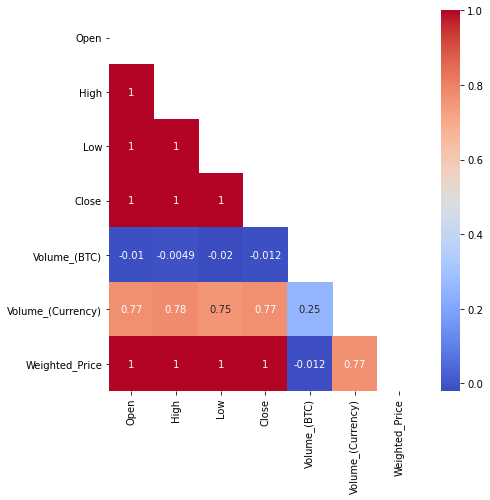

In [69]:
# correlation heatmap
mask = np.triu(daily_df_imputed.corr())
plt.figure(figsize=(7, 7)) 
sns.heatmap(daily_df_imputed.corr(), mask=mask, xticklabels=True, yticklabels=True, cmap='coolwarm', annot=True)
#xticklabels and yticklabels are set to True to display all columns in the heatmap
plt.show()

### From the correlation heatmap, we see that OHLC and Weighted price are highly correlated

In [70]:
daily_OHLCWp = daily_df_imputed.iloc[:, [0, 1, 2, 3, 6]].copy() # we will use a daily time frame for the rest 
                                    # series. Here, we make a dataframe of the remaining 5 series

In [71]:
daily_OHLCWp.head()

,Open,High,Low,Close,Weighted_Price
Timestamp,,,,,
2011-12-31,4.39,4.58,4.39,4.58,4.462126
2012-01-01,4.58,5.00,4.58,5.00,4.896730
2012-01-02,5.00,5.00,5.00,5.00,5.000000
2012-01-03,5.00,5.32,5.00,5.29,5.279641
2012-01-04,5.29,5.57,4.93,5.57,5.297575


### OHLCWp stands for ````Open````, ````High````, ````Low````, ````Close````, and ````Weighted_Price````

## Test for stationarity using the ADF TEST

In [72]:
from statsmodels.tsa.stattools import adfuller

In [73]:
# defining a function to print out adf results
def get_adf_results(df):
    results_cols = ['ADF_Stat', 'p_value', 'n_lags', 'n_observations', '1%', '5%', '10%']
    results = {k: [] for k in results_cols}
    
    for col in df:
    # for each column,
        adf_result = adfuller(df[col]) # computes the adf result
        
        for i in range(len(results_cols)):
            if i < 4:
                results[results_cols[i]].append(adf_result[i])
            else:
                results[results_cols[i]].append(adf_result[4][results_cols[i]])
                
    return pd.DataFrame(results, index=df.columns)

In [ ]:
get_adf_results(daily_OHLCWp)

### from the results, we see that daily OHLC and Weighted_Price are not stationary

## Cointegration Test

In [74]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [75]:
# defining a function that will print out cointegration results
def get_coint_results(df, det_order=-1, k_ar_diff=1):
    cj = coint_johansen(df, det_order, k_ar_diff)
    
    critical_trace = cj.trace_stat_crit_vals
    critical_max_eigen = cj.max_eig_stat_crit_vals
    eigen_vector = cj.evec[:, np.argmax(cj.eig)]
    
    results = {'Trace_stat': cj.lr1, '90% Trace': critical_trace[:, 0], '95% Trace': critical_trace[:, 1], 
               '99% Trace': critical_trace[:, 2], 'Max_eigen_stat': cj.lr2, '90% eigen': critical_max_eigen[:, 0], 
                '95% eigen': critical_max_eigen[:, 1], '99% eigen': critical_max_eigen[:, 2]}
    
    ind = ['r=0'] + ['r<='+str(i) for i in range(1, df.shape[1])]
    
    return pd.DataFrame(results, index=ind), eigen_vector

Here is a [link](https://en.wikipedia.org/wiki/Vector_autoregression) to know more about cointegration

In [77]:
coint_result_OHLCWp = get_coint_results(daily_OHLCWp) # gets cointegration results of OHLCWp
coint_result_OHLCWp[0]

,Trace_stat,90% Trace,95% Trace,99% Trace,Max_eigen_stat,90% eigen,95% eigen,99% eigen
r=0,5316.278695,56.2839,60.0627,67.6367,1974.657803,27.9160,30.4428,35.7359
r<=1,3341.620893,37.0339,40.1749,46.5716,1556.482272,21.8370,24.1592,29.0609
r<=2,1785.138621,21.7781,24.2761,29.5147,1170.317586,15.7175,17.7961,22.2519
r<=3,614.821035,10.4741,12.3212,16.3640,578.429632,9.4748,11.2246,15.0923
r<=4,36.391403,2.9762,4.1296,6.9406,36.391403,2.9762,4.1296,6.9406


### from the results, we see that OHLCWp are not cointegrating even to a threshold of 90%

In [78]:
get_adf_results(np.log(daily_OHLCWp)) # checks if the log transform of OHLCWp is stationary

,ADF_Stat,p_value,n_lags,n_observations,1%,5%,10%
Open,-1.125108,0.704956,24,3353,-3.432302,-2.862402,-2.567229
High,-1.162893,0.689351,24,3353,-3.432302,-2.862402,-2.567229
Low,-1.078378,0.723617,10,3367,-3.432294,-2.862399,-2.567227
Close,-1.124484,0.705210,24,3353,-3.432302,-2.862402,-2.567229
Weighted_Price,-1.136194,0.700424,24,3353,-3.432302,-2.862402,-2.567229


### from the results, we see that the log transform of OHLCWp is not stationary also

In [79]:
coint_result_log_OHLCWp = get_coint_results(np.log(daily_OHLCWp)) # checks if the log transform of OHLCWp are 
                                                              # cointegrating
coint_result_log_OHLCWp[0]

,Trace_stat,90% Trace,95% Trace,99% Trace,Max_eigen_stat,90% eigen,95% eigen,99% eigen
r=0,5439.334800,56.2839,60.0627,67.6367,2258.712734,27.9160,30.4428,35.7359
r<=1,3180.622066,37.0339,40.1749,46.5716,1436.539880,21.8370,24.1592,29.0609
r<=2,1744.082186,21.7781,24.2761,29.5147,1362.124112,15.7175,17.7961,22.2519
r<=3,381.958074,10.4741,12.3212,16.3640,372.827899,9.4748,11.2246,15.0923
r<=4,9.130175,2.9762,4.1296,6.9406,9.130175,2.9762,4.1296,6.9406


### from the results, we see that OHLCWp are cointegrating more than a threshold of 95%. So, there exist at least 5 cointegrating vectors(eigen vectors) when operated on the non-stationary OHLCWp, will make them stationary. Let's check them out!

In [80]:
# operating the non-stationary OHLC on the eigen vectors
stationary_OHLCWp = np.matmul(np.array(np.log(daily_OHLCWp)), coint_result_log_OHLCWp[1].reshape(-1, 1))

Text(0, 0.5, 'Co-integrated OHLCWp')

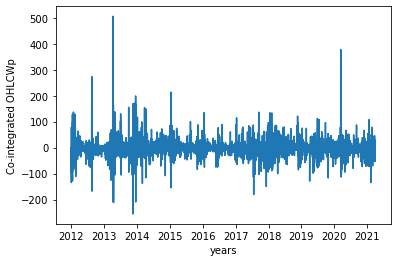

In [81]:
plt.plot(daily_OHLCWp.index, stationary_OHLCWp) # checks the plots of after the operation in the eigen vectors
plt.xlabel('years')
plt.ylabel('Co-integrated OHLCWp')

### from the plot, we see that that although the log of OHLCWp themselves aren't stationary, they will become stationary after operation on the eigen vectors. Let's further confirm this by seeing the results of ADF

In [ ]:
get_adf_results(pd.DataFrame({'OHLCWp': stationary_OHLCWp.flatten()}, index=daily_df_imputed.index))

### we now see that after operating the log of OHLCWp on the eigen vectors, they are will become stationary. We conclude that the log of OHLCWp are indeed cointegrated. We won't conduct cointegration test for the weekly btc and currency because they didn't meet the pre-requisite of cointegration. Btc according to ADF test is I(0) while Currency currency is I(0) after taking log transform. So, we proceed to applying differencing on the log of btc and currency.

## Causation Test

In [82]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR

In [83]:
def get_grangers_causation_results(df, maxlag, test='ssr_chi2test'):    
    results = []
    
    for row in df.columns:
        row_result = []
        
        for col in df.columns:
            test_result = grangercausalitytests(df[[col, row]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1], 4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            row_result.append(min_p_value)
            
        results.append(row_result)
        
    ind = [i + '_x' for i in df.columns]
    cols = [i + '_y' for i in df.columns]
    
    return pd.DataFrame(np.array(results), index=ind, columns=cols)

In [84]:
# creating a time series split function
def ts_train_test_split(df, test_size):
    len_test = int(df.shape[0]*test_size)
    split_point = df.index[-len_test]
    
    train, test = df[df.index < split_point], df[df.index >= split_point]
    
    return train, test

In [85]:
# splitting OHLCWp into train and test set
OHLCWp_train, OHLCWp_test = ts_train_test_split(np.log(daily_OHLCWp), 0.25)

In [86]:
model_ohlcwp = VAR(OHLCWp_train) # initializes VAR object
model_ohlcwp.select_order(maxlags=20).summary() # gets the summary

,AIC,BIC,FPE,HQIC
0,-24.31,-24.30,2.767e-11,-24.31
1,-39.43,-39.36,7.527e-18,-39.40
2,-39.49,-39.37*,7.040e-18,-39.45
3,-39.53,-39.34,6.808e-18,-39.46
4,-39.55,-39.31,6.638e-18,-39.47*
5,-39.57,-39.27,6.501e-18,-39.47
6,-39.59,-39.23,6.420e-18,-39.46
7,-39.61,-39.20,6.254e-18,-39.46
8,-39.62,-39.15,6.192e-18,-39.45
9,-39.63,-39.10,6.160e-18,-39.43


### from the AIC score, the best lag order to use for OHLCWp is 11

In [87]:
get_grangers_causation_results(np.log(daily_OHLCWp), 11)        

,Open_y,High_y,Low_y,Close_y,Weighted_Price_y
Open_x,1.0,0.0,0.0,0.0012,0.0000
High_x,0.0,1.0,0.0,0.0000,0.0000
Low_x,0.0,0.0,1.0,0.0736,0.0584
Close_x,0.0,0.0,0.0,1.0000,0.0000
Weighted_Price_x,0.0,0.0,0.0,0.0000,1.0000


### From the causation test, we see clearly that almost all the p-values of OHLCWp are less than the 0.05 significant threshold, while just two of them are greater than 0.05 but less than 0.1 significant threshold. SO, we can conclude that the causation amongst OHLCWp is high.

## Modelling

In [88]:
# creating a walk forward fuction that will split a time series into training and testing, and return a tuple of
# the test set and the predicited test set
def walk_forward_VAR(df, test_size, lag_order):
    
    train, test = ts_train_test_split(df, test_size) # splits the data into train and test set
        
    history = [list(x) for x in np.array(train)] # makes a list of lists from the train set
    forecasts = [] # empty list to store our forecasts
    
    for t in range(test.shape[0]): # for each test set,
        model = VAR(np.array(history)) # initialize a VAR model on the train set,              
        model_fit = model.fit(lag_order) # fit the model
        yhat = model_fit.forecast(model.y, steps=1) # forecast just the next time step
        forecasts.append(list(yhat[0])) # add the forecast to the forecasts list
        history.append(list(np.array(test)[t])) # add the actual test value as the last observation of the 
                                                # train set 
            
    # return a tuple of the test set and the predicited test set as a tuple of dataframes 
    return test, pd.DataFrame(np.array(forecasts), index=test.index)

In [89]:
# OHLC walk forward
OHLCWp_VAR_results_test, OHLCWp_VAR_results_pred = walk_forward_VAR(np.log(daily_OHLCWp), 0.25, 11)
OHLCWp_VAR_results = np.exp(OHLCWp_VAR_results_test), np.exp(OHLCWp_VAR_results_pred)

In [91]:
# importing mean squared error metric
from sklearn.metrics import mean_squared_error as mse

In [92]:
# defining mean absolute percentage error metric
def mape(df_true, df_pred, epsilon=1e-4):
    df_true[df_true == 0] = epsilon # replaces every occurence of zero in the true values with epsilon
    
    error = df_true - df_pred
    
    return 100 * np.mean(np.abs(error/df_true), axis=0)

In [95]:
def get_rmse_and_mape(df_true, df_pred):
    def mae(y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    def rmspe(y_true, y_pred):
        return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2)) * 100

    results = {
        'RMSE': np.sqrt(np.mean((np.array(df_true) - np.array(df_pred))**2, axis=0)),
        'MAE': mae(np.array(df_true), np.array(df_pred)),
        'RMSPE': rmspe(np.array(df_true), np.array(df_pred))
    }

    return pd.DataFrame(results, index=df_true.columns)

In [94]:
# defining a function to return both rmse and mape scores
def get_rmse_and_mape(df_true, df_pred):
    results = {'RMSE': mse(np.array(df_true), np.array(df_pred), multioutput='raw_values', squared=False), 
               'MAPE (%)': mape(np.array(df_true), np.array(df_pred))}
    
    return pd.DataFrame(results, index=df_true.columns)

In [96]:
get_rmse_and_mape(OHLCWp_VAR_results[0], OHLCWp_VAR_results[1]) # gets the rmse and mape scores of OHLC

,RMSE,MAE,RMSPE
Open,12.385498,253.464973,3.225442
High,547.468411,253.464973,3.225442
Low,695.046297,253.464973,3.225442
Close,783.400085,253.464973,3.225442
Weighted_Price,560.017063,253.464973,3.225442


In [ ]:
# plots of our predictions and the true values for OHLCWp with VAR model
fig = plt.figure(figsize=(18, 8))
for i, col_test, col_pred in zip(range(1, 6), OHLCWp_VAR_results[0], OHLCWp_VAR_results[1]):
    if i == 5:
        a = fig.add_subplot(3, 1, 3)
        plt.plot(OHLCWp_VAR_results[0][col_test])
        plt.plot(OHLCWp_VAR_results[1].iloc[:, col_pred])
        plt.legend(['true', 'pred'])
        plt.xlabel('days')
        plt.ylabel(col_test)
        
    else:
        a = fig.add_subplot(3, 2, i)
        plt.plot(OHLCWp_VAR_results[0][col_test])
        plt.plot(OHLCWp_VAR_results[1].iloc[:, col_pred])
        plt.legend(['true', 'pred'])
        plt.xlabel('days')
        plt.ylabel(col_test)

In [ ]:
# plots of our predictions and the true values for OHLCWp with VAR model
fig = plt.figure(figsize=(18, 8))
for i, col_test, col_pred in zip(range(1, 6), OHLCWp_VAR_results[0], OHLCWp_VAR_results[1]):
    if i == 5:
        a = fig.add_subplot(3, 1, 3)
        plt.plot(OHLCWp_VAR_results[0][col_test] - OHLCWp_VAR_results[1].iloc[:, col_pred])
        plt.xlabel('days')
        plt.ylabel(col_test)
        
    else:
        a = fig.add_subplot(3, 2, i)
        plt.plot(OHLCWp_VAR_results[0][col_test] - OHLCWp_VAR_results[1].iloc[:, col_pred])
        plt.xlabel('days')
        plt.ylabel(col_test)

In [ ]:
# plots of our predictions and the true values for OHLCWp with VAR model
fig = plt.figure(figsize=(18, 8))
for i, col_test, col_pred in zip(range(1, 6), OHLCWp_VAR_results[0], OHLCWp_VAR_results[1]):
    if i == 5:
        a = fig.add_subplot(3, 1, 3)
        plt.hist(OHLCWp_VAR_results[0][col_test] - OHLCWp_VAR_results[1].iloc[:, col_pred])
        plt.xlabel('days')
        plt.ylabel(col_test)
        
    else:
        a = fig.add_subplot(3, 2, i)
        plt.hist(OHLCWp_VAR_results[0][col_test] - OHLCWp_VAR_results[1].iloc[:, col_pred])
        plt.xlabel('days')
        plt.ylabel(col_test)